In [49]:
import pandas as pd
import statsmodels.api as sm

# 데이터 로드
file_path = "C:\\Users\\NSE\\Downloads\\진짜_최종_키워드 결합.csv"
df = pd.read_csv(file_path)

# 데이터 타입 확인
print("Data types before conversion:")
print(df.dtypes)


Data types before conversion:
no                                                                 int64
image_hash                                                        object
Gender                                                            object
Age                                                               object
Ad name                                                           object
                                                                   ...  
항상_취약_늘_돌                                                          int64
수정_인연_인간_공부_관계                                                     int64
여름_파워_8월_가득_시원_탄생석                                                 int64
BUSINESS_HONOR_POSITION_POSSESSIONS_POWER_PRESTIGE_WEALTH_이클립스     int64
비결_지성_의지력_소달라이트_결단력_내                                              int64
Length: 212, dtype: object


In [50]:
# 수치형 컬럼 리스트
numeric_cols = ['Website purchases', 'Return on ad spend (ROAS)', 'Website checkouts initiated', 'Amount spent', 'CTR (link click-through rate)', 'C/R']

# 수치형으로 변환
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 데이터 타입 확인
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
no                                                                 int64
image_hash                                                        object
Gender                                                            object
Age                                                               object
Ad name                                                           object
                                                                   ...  
항상_취약_늘_돌                                                          int64
수정_인연_인간_공부_관계                                                     int64
여름_파워_8월_가득_시원_탄생석                                                 int64
BUSINESS_HONOR_POSITION_POSSESSIONS_POWER_PRESTIGE_WEALTH_이클립스     int64
비결_지성_의지력_소달라이트_결단력_내                                              int64
Length: 212, dtype: object


In [51]:
# 나이대와 성별 인코딩
df_age = pd.get_dummies(df['Age'], prefix='나이대', drop_first=True)
df_gender = pd.get_dummies(df['Gender'], prefix='성별', drop_first=False)
print("Age dummy variables:")
print(df_age.head())
print("Gender dummy variables:")
print(df_gender.head())

Age dummy variables:
   나이대_18-24  나이대_25-34  나이대_35-44  나이대_45-54  나이대_55-64  나이대_65+  나이대_Unknown
0       True      False      False      False      False    False        False
1      False       True      False      False      False    False        False
2      False      False       True      False      False    False        False
3      False      False      False       True      False    False        False
4      False      False      False      False       True    False        False
Gender dummy variables:
   성별_female  성별_male  성별_unknown
0       True    False       False
1       True    False       False
2       True    False       False
3       True    False       False
4       True    False       False


In [52]:
# 열 인덱스를 기준으로 인덱싱 (17번째 열부터 끝까지)
df_keywords = df.iloc[:, 17:]

# 결과 출력
print(df_keyword)

      2023  2024년  ㄴㄴㄴ  가정의 달  가족  감정  개업  걱정  건강  검색  ...  한국_디테일_착용감  \
0        0      0    0      0   0   0   0   0   1   0  ...           0   
1        0      0    0      0   0   0   0   0   1   0  ...           0   
2        0      0    0      0   0   0   0   0   1   0  ...           0   
3        0      0    0      0   0   0   0   0   0   0  ...           0   
4        0      0    0      0   0   0   0   0   0   0  ...           0   
...    ...    ...  ...    ...  ..  ..  ..  ..  ..  ..  ...         ...   
5426     0      0    0      0   1   0   0   0   0   0  ...           0   
5427     0      0    0      0   0   0   0   0   0   0  ...           0   
5428     0      0    0      0   0   0   0   0   0   0  ...           0   
5429     0      0    0      0   0   0   0   0   0   0  ...           0   
5430     0      0    0      0   0   0   0   0   0   0  ...           0   

      8월_탄생석_여름_파워스톤  고객_만족_제품_후기  길_당신_미래_반드시  느낌_쇼핑백_엽서_함께  \
0                  0            0            0 

In [53]:
# 독립 변수와 종속 변수를 결합
X = pd.concat([df['Amount spent'], df_keywords, df_age, df_gender], axis=1)

# 종속 변수
y = df['Website purchases']

# 데이터 타입 확인 및 변환
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 모든 bool 타입 변수를 float으로 변환
X = X.astype(float)

# 결측값 제거
X = X.dropna()
y = y.loc[X.index]

# 상수항 추가
X = sm.add_constant(X)

변환 전 기초 통계량:
 count    5.431000e+03
mean     2.966799e+04
std      2.110106e+05
min      0.000000e+00
25%      9.600000e+01
50%      7.320000e+02
75%      5.714000e+03
max      9.498881e+06
Name: Amount spent, dtype: float64
변환 후 기초 통계량:
 count    5431.000000
mean        0.003123
std         0.022214
min         0.000000
25%         0.000010
50%         0.000077
75%         0.000602
max         1.000000
Name: Amount spent, dtype: float64

변환 전후의 기초 통계량 비교:
               변환 전         변환 후
count  5.431000e+03  5431.000000
mean   2.966799e+04     0.003123
std    2.110106e+05     0.022214
min    0.000000e+00     0.000000
25%    9.600000e+01     0.000010
50%    7.320000e+02     0.000077
75%    5.714000e+03     0.000602
max    9.498881e+06     1.000000


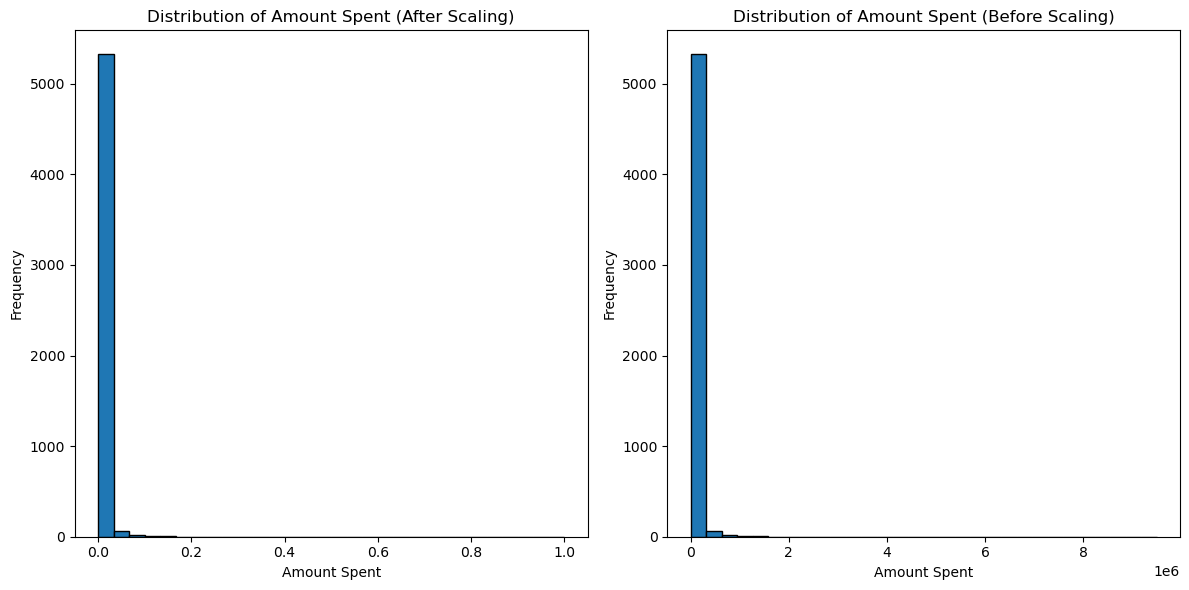

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Amount spent 열의 변환 전 기초 통계량
original_stats = X['Amount spent'].describe()
print("변환 전 기초 통계량:\n", original_stats)

# Min-Max 스케일링을 위한 스케일러 생성
scaler = MinMaxScaler()

# Amount spent 열을 Min-Max 스케일링
X['Amount spent'] = scaler.fit_transform(X[['Amount spent']])

# Amount spent 열의 변환 후 기초 통계량
scaled_stats = X['Amount spent'].describe()
print("변환 후 기초 통계량:\n", scaled_stats)

# 변환 전후 기초 통계량 비교
print("\n변환 전후의 기초 통계량 비교:")
comparison = pd.DataFrame({'변환 전': original_stats, '변환 후': scaled_stats})
print(comparison)

# 히스토그램을 사용한 분포 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X['Amount spent'], bins=30, edgecolor='k')
plt.title('Distribution of Amount Spent (After Scaling)')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scaler.inverse_transform(X[['Amount spent']]), bins=30, edgecolor='k')
plt.title('Distribution of Amount Spent (Before Scaling)')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 곧 9,498,881원이 1이 된거임

In [46]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 모델 적합
ridge_model = Ridge(alpha=1.0)  # alpha 값은 필요에 따라 조정 가능
ridge_model.fit(X, y)

# 예측 값 계산
y_pred = ridge_model.predict(X)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# 결과 출력
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Intercept:", ridge_model.intercept_)

# 독립 변수 이름과 계수 출력
coefficients = ridge_model.coef_

# X가 DataFrame이라고 가정하면
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f"Feature {i}" for i in range(len(coefficients))]

coeff_dict = dict(zip(feature_names, coefficients))

# 독립 변수와 계수 출력
for feature, coef in coeff_dict.items():
    print(f"{feature}: {coef}")



Mean Squared Error: 14.451722130863187
R^2 Score: 0.9008676816597304
Intercept: -0.3915412429224532
const: 0.0
Amount spent: 380.4150104264427
14K: -1.0120641560313082
19K: -0.12654799563394953
2023: 0.14815728813082565
20K: -0.4199494832734857
21K: -0.5900858506562547
22K: -0.2200606721344216
23K: -0.0652735777053025
24K: -0.12302438160716393
25K: -0.3408955959500164
26K: 0.3830238505298942
27K: -1.245552287066861
28K: -0.09078296614214577
29K: -0.17439184706306352
30K: 0.19631508432960496
31K: 0.10226567184667905
32K: -0.20804410062824646
33K: -0.014140694915613799
34K: -0.04711586910223041
35K: 0.011428233031649587
가까이: -0.2520817775007675
가정의 달: -0.5126378254767319
가족: -0.6167506299966585
감사: -0.237856542595967
걱정: 0.012064503951474109
건강: 0.14016995116831937
고민: -0.43615001016102617
골드: 0.028550743708499318
골드오닉스: 0.08595274684831035
관리: -0.2772456342993865
구매자: -0.06629938463001257
기분: 0.42472781015809696
기운: -0.27137083790142896
깔끔: 0.26335469407109857
나: -0.33393160253553367
남성

In [25]:
df

,Unnamed: 0,no,image_hash,Gender,Age,Ad name,Ad creative image URL,Website purchases,Return on ad spend (ROAS),Website checkouts initiated,...,한국_디테일_착용감,8월_탄생석_여름_파워스톤,고객_만족_제품_후기,길_당신_미래_반드시,느낌_쇼핑백_엽서_함께,로즈쿼츠_새 출발_크리스탈_핸드메이드,룩_비즈니스_업무_환경,지성_인텔리전스_결단력_소달라이트,빡치게_부장_분노_차단_부정_이너피스,POSITION_POSSESSIONS_POWER_PRESTIGE_WEALTH_블루 아게이트_이클립스_BUSINESS_HONOR
0,1919,1920,620b3173edbc6a4658a14e59ac2e5693,female,45-54,11,https://www.facebook.com/ads/image/?d=AQIVrgai...,1,0.448475,1,...,0,0,0,0,0,0,0,0,0,0
1,1925,1926,620b3173edbc6a4658a14e59ac2e5693,male,45-54,흑요석 큐어1,https://www.facebook.com/ads/image/?d=AQJPQCkO...,1,0.370009,1,...,0,0,0,0,0,0,0,0,0,0
2,1918,1919,620b3173edbc6a4658a14e59ac2e5693,female,35-44,11,https://www.facebook.com/ads/image/?d=AQIVrgai...,2,0.086405,4,...,0,0,0,0,0,0,0,0,0,0
3,1464,1465,34c2c468ae6d1ff375e9c8ffeae5ad72,female,55-64,4,https://www.facebook.com/ads/image/?d=AQIYF4gM...,0,0.000000,8,...,0,0,0,0,0,0,0,0,0,0
4,180,2774,c2eb9456703a833c9ca56e90bd75e6e5,male,55-64,키링3,https://www.facebook.com/ads/image/?d=AQL9AWtF...,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5426,579,580,77c149ce55fe07611afa25fd0049a49e,male,65+,굿스톤+포르테 세트 단일이미지1,https://scontent-lhr6-2.xx.fbcdn.net/v/t45.160...,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
5427,857,858,b096be7a038237b98038c6ff9df6d75f,female,25-34,단일5_블루스톤,https://www.facebook.com/ads/image/?d=AQLvf0bx...,0,0.000000,0,...,0,1,0,0,0,0,0,0,0,0
5428,788,4189,72f5ea49be809e0a9087d73ccb524f34,unknown,45-54,소달인텔리 단일2,https://scontent-lhr8-1.xx.fbcdn.net/v/t45.160...,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
5429,710,4111,6959936696ba142637a8c6705fdf49a6,male,65+,레브포르테_영상형_0111,https://scontent-lhr8-2.xx.fbcdn.net/v/t15.134...,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 모델 적합
ridge_model = Ridge(alpha=0.1)  # alpha 값은 필요에 따라 조정 가능
ridge_model.fit(X, y)

# 예측 값 계산
y_pred = ridge_model.predict(X)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# 결과 출력
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print("Intercept:", ridge_model.intercept_)

# 독립 변수 이름과 계수 출력
coefficients = ridge_model.coef_

# X가 DataFrame이라고 가정하면
if isinstance(X, pd.DataFrame):
    feature_names = X.columns
else:
    feature_names = [f"Feature {i}" for i in range(len(coefficients))]

coeff_dict = dict(zip(feature_names, coefficients))

# 독립 변수와 계수 출력
for feature, coef in coeff_dict.items():
    print(f"{feature}: {coef}")

# 결과를 데이터프레임으로 저장
results_df = pd.DataFrame(list(coeff_dict.items()), columns=['Feature', 'Coefficient'])

# 데이터프레임을 CSV 파일로 저장
#results_df.to_csv('ridge_regression_coefficients.csv', index=False)

#print("Results saved to ridge_regression_coefficients.csv")


Mean Squared Error: 3.4309917300060855
R^2 Score: 0.9764649388272261
Intercept: -0.01991072836185559
const: 0.0
Amount spent: 519.1194934194987
14K: -0.6864542554229253
2023: -0.14042619377410726
가까이: 0.15802667652214064
가정의 달: 0.13292375847981575
가족: -0.47611980301271306
감사: 0.07041994321607987
걱정: -1.5037749469627275
건강: 0.24668618978449058
고민: -0.25811707225433356
골드오닉스: 0.17569066137091544
관리: -0.46503892261823726
구매자: 0.07160227388701314
기분: 0.4032940395280339
기운: -0.20730976679622876
깔끔: 0.32924711947754826
끈기: 0.329966754523087
나: 0.036628949626489646
남성: 0.015969829286196127
남친: -0.6786789617392989
노력: 0.4985065070243626
느낌: 0.17702386878542634
능력: 0.4280530030373134
단품: 0.10948182894699261
당신: -0.0633721285505996
대박: 0.5290012333346586
대운: -0.15603535103085037
도전: 0.26413386817492795
돈: -0.07701512476311444
디자인: 0.15308892967356275
막아줌: 0.35366769241850027
물어봄: 0.4455456796716648
반지: -6.577448465288597
배우: 0.5283798823122088
보호: 0.14742602899140456
복: -0.3358336061841281
부: 0.

In [37]:
results_df

,Feature,Coefficient
0,const,0.000000
1,Amount spent,518.859318
2,10월,1.728002
3,11월,-1.929679
4,12월,2.114254
...,...,...
247,나이대_65+,0.043201
248,나이대_Unknown,0.132443
249,성별_female,-0.206757
250,성별_male,0.010398


In [48]:
results_df.to_csv("C:\\Users\\NSE\\Downloads\\키워드 결합 ver 릿지 회귀.csv", index=False)

In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# 상수항 제거
X_vif_before = X.drop(columns=['const'])

# VIF 계산
vif_df_before = calculate_vif(X_vif_before)

# VIF 결과 출력
vif_df_before.head(184)



,Variable,VIF
0,Amount spent,1.136644
1,2023,1.892292
2,2024년,1.787453
3,ㄴㄴㄴ,1.004007
4,가정의 달,1.904616
...,...,...
179,나이대_55-64,154.640776
180,나이대_65+,136.125804
181,나이대_Unknown,4.726724
182,성별_female,468.083794


In [20]:
vif_df_before.to_csv("C:\\Users\\NSE\\Downloads\\키워드 결합 ver vif.xlsx")